In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Sampling from a 2D exponential distribution using Gibbs sampling
In this assignment, you'll sample from the joint pdf
$$
\begin{aligned}
f_{X,Y}(x, y) =
\begin{cases}
c \exp(-\lambda x y), & \text{for } (x, y) \in [0, \text{xlim}] \times [0, \text{ylim}], \\
0, & \text{otherwise}.
\end{cases}
\end{aligned}
$$
You'll need to use the equations you've derived in the written assignment to construct the Gibbs sampler. Start by defining methods in the `GibbsSampler` class to sample from the conditional distributions. Then, implement the `rvs` method to run the Gibbs sampler.
The only source of randomness should be `rng.random()`. You should implement your own *inverse transform sampling method* to sample from the truncated exponential distribution.

In [25]:
class GibbsSampler:
    def __init__(self, lambda_, xlim, ylim, seed=0):
        self.lambda_ = lambda_
        self.xlim = xlim
        self.ylim = ylim
        # It's a good practice to use a separate random number generator for each class
        # use self.rng.random() instead of np.random.uniform() to generate random numbers
        self.rng = np.random.default_rng(seed)
        
    def X_given_Y(self, x, y0):
        """ Returns a single sample from the conditional distribution of X given Y=y0 """
        u = self.rng.random()
        return -np.log(1 - u * (1 - np.exp(-self.lambda_ * y0 * self.xlim))) / (self.lambda_ * y0)
        
    def Y_given_X(self, y, x0):
        """ Returns a single sample from the conditional distribution of Y given X=x0 """
        u = self.rng.random()
        return -np.log(1 - u * (1 - np.exp(-self.lambda_ * x0 * self.ylim))) / (self.lambda_ * x0)
        
    def rvs(self, size=1):
        """ Returns samples of size `size` from the joint distribution of X and Y """
        x, y = np.zeros(size), np.zeros(size)
        x[0], y[0] = self.rng.random() * self.xlim, self.rng.random() * self.ylim
        for i in range(0, size - 1):
            x[i+1] = self.X_given_Y(None, y[i]) # doesn't depend on current x
            y[i+1] = self.Y_given_X(None, x[i+1]) # doesn't depend on current y
        return x, y

## Trace Plots
Generate 5000 samples with the parameters in the cell below and make a scatter plot of the samples.

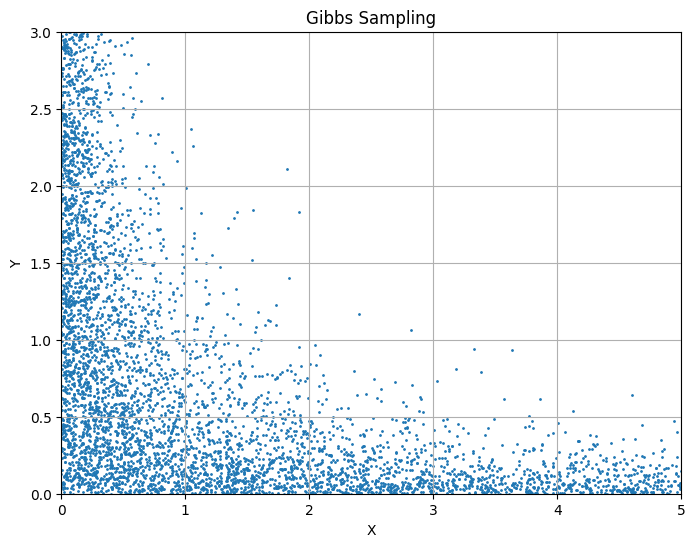

In [26]:
N = 5000
# Parameters
lambda_, xlim, ylim = 2, 5, 3
sampler = GibbsSampler(lambda_, xlim, ylim)

x, y = sampler.rvs(N)

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=1)
plt.xlim(0, xlim)
plt.ylim(0, ylim)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gibbs Sampling')
plt.grid()
plt.show()

## Autocorrelation
Compute the autocorrelation of the samples for both $X$ and $Y$ with lags between 1 and 20. Plot the autocorrelation functions.
Use `np.corrcoef` to compute the correlation matrix and extract the correlation between $X$ and $Y$. Note that `np.correlate` is not the same as the correlation coefficient.
This should (hopefully) show that there is no need to thin the samples or burn any of the initial samples in this case. See also: [http://users.stat.umn.edu/~geyer/mcmc/burn.html](http://users.stat.umn.edu/~geyer/mcmc/burn.html)

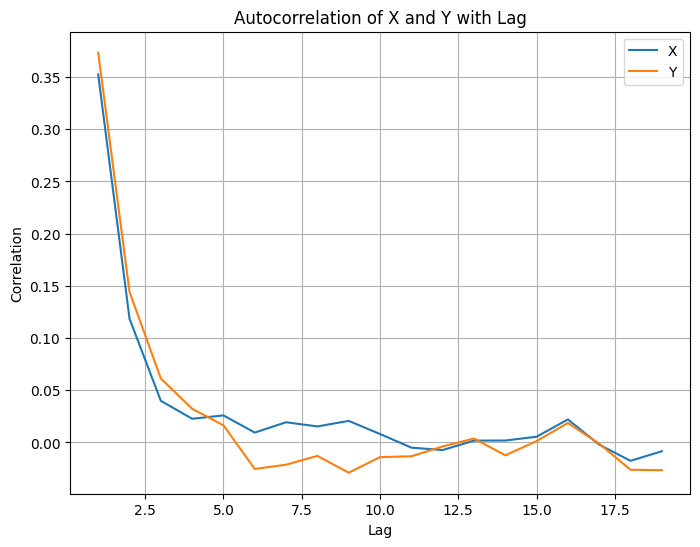

In [27]:
lags = np.arange(1, 20, 1)

corrX = np.zeros(len(lags))
corrY = np.zeros(len(lags))

for i, lag in enumerate(lags):
    corrmatX = np.corrcoef(x[:N-lag], x[lag:N])
    corrmatY = np.corrcoef(y[:N-lag], y[lag:N])
    corrX[i] = corrmatX[0, 1]
    corrY[i] = corrmatY[0, 1]

plt.figure(figsize=(8, 6))
plt.plot(lags, corrX, label='X')
plt.plot(lags, corrY, label='Y')
plt.legend()
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Autocorrelation of X and Y with Lag')
plt.grid()
plt.show()
